# Mask R-CNN Demo

A quick intro to using the pre-trained model to detect and segment objects.

In [7]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/tree/"))  # To find local version
import tree

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

ModelName = "tree20190225T2316"#"tree20190302T1235"#"tree20190221T2228"
#"tree20190224T0951"#"tree20190223T1028"#"tree20190221T1430"#"tree20190220T2343"#
# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "logs/"+ModelName+"/mask_rcnn_tree_0110.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
# IMAGE_DIR = os.path.join(ROOT_DIR, "D:/DTemp/Competitions/treeDetection/testImages")
IMAGE_DIR = "D:/DTemp/Competitions/treeDetection/testImages"
OUTPUT_DIR = "D:/DTemp/Competitions/treeDetection/results/" + ModelName
try:  
    os.mkdir(OUTPUT_DIR)
except OSError:  
    print ("Creation of the directory %s failed" % OUTPUT_DIR)
else:  
    print ("Successfully created the directory %s " % OUTPUT_DIR)

Successfully created the directory D:/DTemp/Competitions/treeDetection/results/tree20190225T2316 


## Configurations

We'll be using a model trained on the MS-COCO dataset. The configurations of this model are in the ```CocoConfig``` class in ```coco.py```.

For inferencing, modify the configurations a bit to fit the task. To do so, sub-class the ```CocoConfig``` class and override the attributes you need to change.

In [8]:
class InferenceConfig(tree.treeConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.8
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

## Create Model and Load Trained Weights

In [9]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)
# model.load_weights(COCO_MODEL_PATH, by_name=True, exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])

Re-starting from epoch 110


## Class Names

The model classifies objects and returns class IDs, which are integer value that identify each class. Some datasets assign integer values to their classes and some don't. For example, in the MS-COCO dataset, the 'person' class is 1 and 'teddy bear' is 88. The IDs are often sequential, but not always. The COCO dataset, for example, has classes associated with class IDs 70 and 72, but not 71.

To improve consistency, and to support training on data from multiple sources at the same time, our ```Dataset``` class assigns it's own sequential integer IDs to each class. For example, if you load the COCO dataset using our ```Dataset``` class, the 'person' class would get class ID = 1 (just like COCO) and the 'teddy bear' class is 78 (different from COCO). Keep that in mind when mapping class IDs to class names.

To get the list of class names, you'd load the dataset and then use the ```class_names``` property like this.
```
# Load COCO dataset
dataset = coco.CocoDataset()
dataset.load_coco(COCO_DIR, "train")
dataset.prepare()

# Print class names
print(dataset.class_names)
```

We don't want to require you to download the COCO dataset just to run this demo, so we're including the list of class names below. The index of the class name in the list represent its ID (first class is 0, second is 1, third is 2, ...etc.)

In [10]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'tree'] #,'person', 'bicycle', 'car']

## Run Object Detection

1_2 (26).jpg
Processing 1 images
image                    shape: (1152, 2048, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  132.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 2048.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


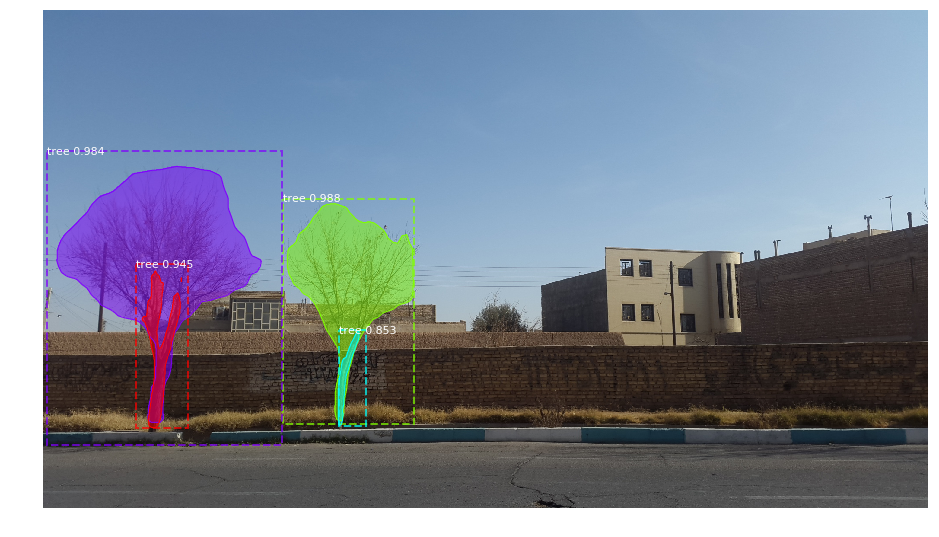

In [23]:
# for reloading visualizeMAT we want the following magic commands, but for above cells, mrcnn fails!
# %load_ext autoreload
# %autoreload 2
import visualizeMAT
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
# aks = random.choice(file_names)
for i,aks in enumerate(file_names):
    image = skimage.io.imread(os.path.join(IMAGE_DIR, aks))
#     if i in [1,2]:
    if aks != "1_2 (26).jpg":
        continue
    print(aks)
    # Run detection
    results = model.detect([image], verbose=1)

    # Visualize results
    r = results[0]
    # visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],class_names, r['scores'])
    figsize=(16, 16)
    fig, ax = plt.subplots(1, figsize=figsize)
    # fig.set_size_inches(16,16)
    # ax = plt.Axes(fig, [0., 0., 1., 1.])
    # ax.set_axis_off()
    # fig.add_axes(ax)
    outputFile = os.path.join(OUTPUT_DIR , aks)
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                                class_names, r['scores'],"",figsize,ax)
#     visualizeMAT.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
#                                 class_names, r['scores'],"",figsize,ax)

#     fig.savefig(outputFile,bbox_inches='tight', pad_inches=0,transparent=True)
    
#     if i==2:
#         break


In [31]:
r['rois']

array([[ 434,  554,  956,  858],
       [ 325,    8, 1005,  551],
       [ 585,  215,  966,  334],
       [ 738,  683,  962,  746]])

In [104]:
%load_ext autoreload
%autoreload 2
import rectangle as rect
rboxes = r['rois']
minOverlapRate = .6
k = 0
tobeMerged = []
for i in range(rboxes.shape[0]-1):
    for j in range(1,rboxes.shape[0]):
        if i==j: continue
            
        r1 = rect.Rectangle(*r['rois'][i])
        r2 = rect.Rectangle(*r['rois'][j])
#         print(r1)
#         print(r2)
        overlap = r1 & r2
#         print(overlap)

        union = r1 | r2
#         print(union)
#         print(r1.area,r2.area,overlap.area,union.area)
        overlapRate = overlap.area/r2.area
#         print(overlapRate)
#         print("\n")
        if overlapRate > minOverlapRate:
            tobeMerged.append([i,j])
            k = k+1
            
            

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[3, 2]

In [115]:
for [i,j] in tobeMerged:
    r1 = rect.Rectangle(*r['rois'][i])
    r2 = rect.Rectangle(*r['rois'][j])
    union = r1 | r2
#     rboxes[i] = *union.coord

tobeRemoved = [ij[1] for ij in tobeMerged]
tobeRemoved
rboxes = np.delete(rboxes,tobeRemoved, axis=0)
rboxes    
    

array([[ 434,  554,  956,  858],
       [ 325,    8, 1005,  551]])

In [91]:
rboxes

array([[ 434,  554,  956,  858],
       [ 325,    8, 1005,  551],
       [ 585,  215,  966,  334],
       [ 738,  683,  962,  746]])

In [98]:
b = np.delete(rboxes,1, axis=0)
b[1] = [1,2,3,4]
b

array([[434, 554, 956, 858],
       [  1,   2,   3,   4],
       [738, 683, 962, 746]])

In [80]:
# rr = r['rois'][1]
# print(*r['rois'][1])
rboxes = r['rois']
rboxes.shape[0]

4

# Mark a point inside the mask
https://stackoverflow.com/questions/37519238/python-find-center-of-object-in-an-image

خروجی: الزم است یک فایل متنی شامل نام تصویر، تعداد درختان و مختصات x و y یک نقطه روی
درخت)ها( ارائه شود. نمونه این فایل به صورت زیر میباشد.
شکل 2 .نمونه فایل خروجی
عالوه بر فایل خروجی، یک پوشه شامل تصاویر خروجی نیز باید ارائه شود. بطوریکه در هر تصویر
مختصات نقطهای از درخت با یک مربع کوچک قرمز )قابل رویت با چشم( نشان داده شود. الزم است
این مربع بصورت تو پر با رنگ قرمز باشد. نمونه این تصویر به صورت شکل زیر است.
imageFileName N=#tree x1 y1 x2 y2 ... xN yN
1.jpg 3 10 26 100 54 70 2

In [ ]:
# from PIL import Image
# import numpy as np

# im = Image.open('image.bmp')
# immat = im.load()
# (X, Y) = im.size
# m = np.zeros((X, Y))

# for x in range(X):
#     for y in range(Y):
#         m[x, y] = immat[(x, y)] != (255, 255, 255)

# # without loop
# # m = np.sum(np.asarray(im), -1) < 255*3
# m = m / np.sum(np.sum(m))
# # marginal distributions
# dx = np.sum(m, 1)
# dy = np.sum(m, 0)

# # expected values
# cx = np.sum(dx * np.arange(X))
# cy = np.sum(dy * np.arange(Y))